In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","valid")

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    )

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    )

Found 300 files belonging to 3 classes.


In [6]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\91944\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 233s 7s/step - accuracy: 0.3598 - loss: 1.3614 - val_accuracy: 0.5200 - val_loss: 0.9088
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 170s 6s/step - accuracy: 0.5606 - loss: 0.8905 - val_accuracy: 0.6033 - val_loss: 0.8314
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.6604 - loss: 0.7061 - val_accuracy: 0.7467 - val_loss: 0.4933
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.7764 - loss: 0.5053 - val_accuracy: 0.8767 - val_loss: 0.3110
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.8769 - loss: 0.3046 - val_accuracy: 0.8933 - val_loss: 0.2771
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.9124 - loss: 0.2119 - val_accuracy: 0.8700 - val_loss: 0.2904
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 231s 7s/step - accuracy: 0.9080 - loss: 0.2285 - val_accuracy: 0.8933 - val_loss: 0.2428
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 270s 9s/step - accuracy: 0.9382 - loss: 0.1627 - val_accuracy: 0.9067 - v

In [10]:
train_loss,train_acc=cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9856 - loss: 0.0381
Training accuracy: 0.9844444394111633


In [11]:
val_loss,val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9316 - loss: 0.1656
Validation accuracy: 0.9366666674613953


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.43111109733581543,
  0.5711110830307007,
  0.7133333086967468,
  0.8088889122009277,
  0.8888888955116272,
  0.9155555367469788,
  0.9144444465637207,
  0.9466666579246521,
  0.9544444680213928,
  0.9666666388511658],
 'loss': [1.1352813243865967,
  0.8596644997596741,
  0.6156735420227051,
  0.45354989171028137,
  0.2646639049053192,
  0.2154580056667328,
  0.20601792633533478,
  0.14103136956691742,
  0.12610942125320435,
  0.0828130841255188],
 'val_accuracy': [0.5199999809265137,
  0.6033333539962769,
  0.746666669845581,
  0.8766666650772095,
  0.8933333158493042,
  0.8700000047683716,
  0.8933333158493042,
  0.9066666960716248,
  0.9333333373069763,
  0.9366666674613953],
 'val_loss': [0.9088314771652222,
  0.8314307332038879,
  0.4932659864425659,
  0.311032235622406,
  0.27712777256965637,
  0.2903895974159241,
  0.24281984567642212,
  0.23583783209323883,
  0.16745153069496155,
  0.15836521983146667]}

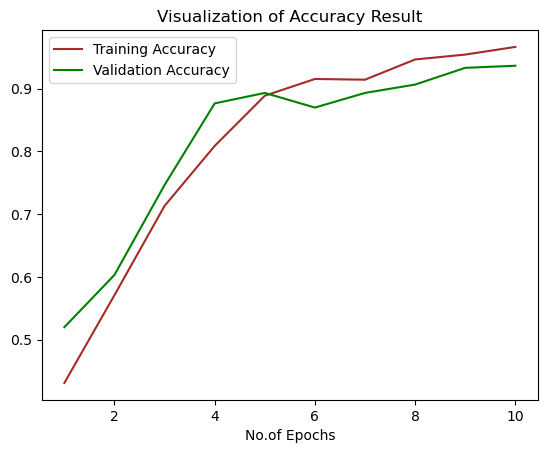

In [14]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No.of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()